# Trabalho 1 - Tipo: FOTOS
Descrição do trabalho:

http://webserver2.tecgraf.puc-rio.br/~mgattass/visao/trb/T1.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Mudando o diretório para o meu Google Drive para não precisar ficar baixando os datasets novamente.

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
cd "drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1/"

[Errno 2] No such file or directory: 'drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1/'
/content/drive/MyDrive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1


In [25]:
!pwd

/content/drive/My Drive/Doutorado/Disciplinas/[2022.2] [PUC-Rio] Visão Computacional - Professor Marcelo Gattass/Trabalhos/Trabalho 1


### Imports

In [26]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as pim

In [27]:
path = './imagens/fotos/'

In [28]:
img = pim.imread( path + 'fuji/25688225598_63d3e2ed15_o.jpg' )

In [29]:
img

array([[[ 88,  80, 101],
        [ 88,  80, 101],
        [ 88,  80, 101],
        ...,
        [111,  86,  92],
        [111,  86,  92],
        [112,  87,  93]],

       [[ 82,  74,  97],
        [ 84,  76,  97],
        [ 86,  78,  99],
        ...,
        [112,  87,  93],
        [112,  87,  93],
        [111,  86,  92]],

       [[ 77,  72,  94],
        [ 79,  74,  96],
        [ 81,  76,  98],
        ...,
        [111,  86,  92],
        [110,  85,  91],
        [113,  88,  94]],

       ...,

       [[ 55,  37,  35],
        [ 52,  34,  32],
        [ 47,  29,  27],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  6,   2,   1]],

       [[ 58,  39,  35],
        [ 58,  37,  34],
        [ 61,  37,  37],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  6,   2,   1]],

       [[ 60,  39,  36],
        [ 63,  39,  37],
        [ 67,  41,  40],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  7,   3,   2]]

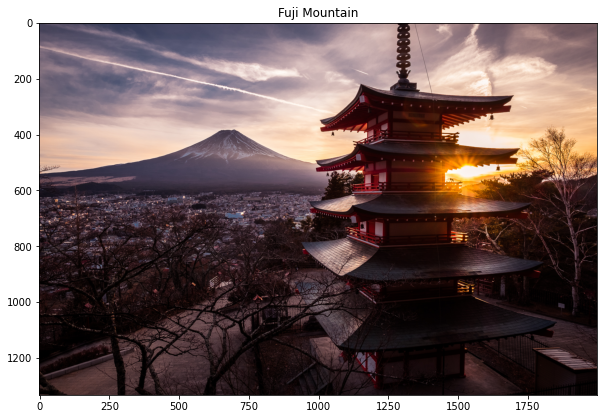

In [30]:
# plt.figure( figsize=(6, 6) )
plt.figure( figsize=(10, 10) )
plt.title( 'Fuji Mountain' )
plt.imshow( img )
plt.show()

In [31]:
def describe_image( img ):

    h, w, nc = img.shape
  
    print( f'shape = {img.shape}' )
    print( f'dtype = {img.dtype}' )
    print( f'w = {w}' )
    print( f'h = {h}' )
    print( f'número de canais de cor = {nc}' )
    print( f'min = { np.amin(img) }' )
    print( f'max = { np.amax(img) }' )


In [32]:
describe_image( img )

shape = (1333, 2000, 3)
dtype = uint8
w = 2000
h = 1333
número de canais de cor = 3
min = 0
max = 255


In [33]:
imgf = img / 255.0
describe_image( imgf )

shape = (1333, 2000, 3)
dtype = float64
w = 2000
h = 1333
número de canais de cor = 3
min = 0.0
max = 1.0


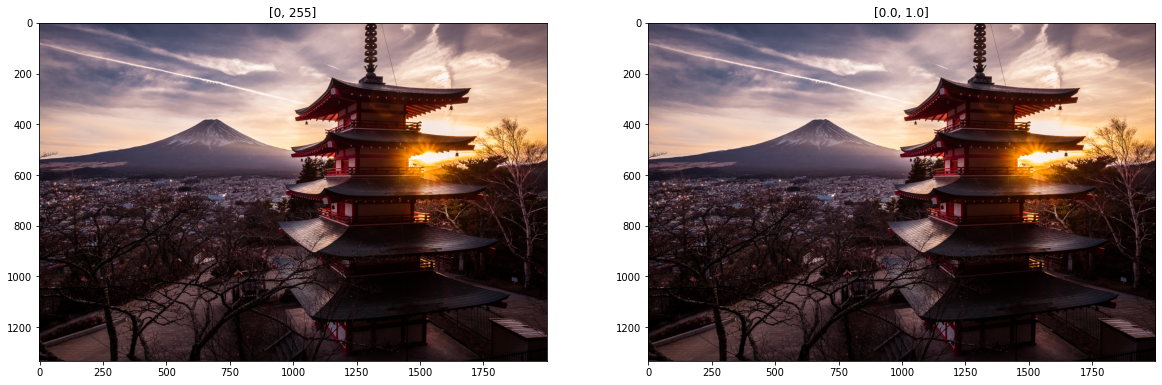

In [34]:
fig, axes = plt.subplots( 1, 2, figsize=(20, 10) )
axes[0].set_title( '[0, 255]' )
axes[0].imshow( img )
axes[1].set_title( '[0.0, 1.0]' )
axes[1].imshow( imgf )
plt.show()

### Luminância relativa de cada um dos canais.

cmap sem ser gray mapeia tons mais escuros para azul e mais claros para amarelo.

(1333, 2000)


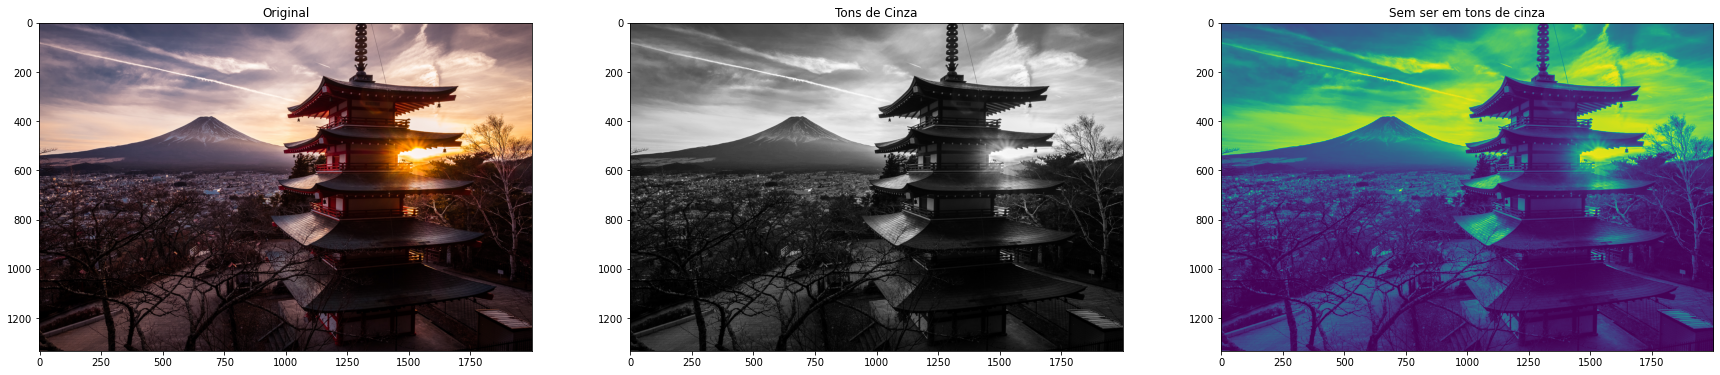

In [35]:
def lum( rgb ):

    return np.dot( rgb, [0.2126, 0.7152, 0.0722] )

gray = lum( imgf )
print( gray.shape )
fig, axes = plt.subplots( 1, 3, figsize=( 30, 10 ) )

axes[0].set_title( 'Original' )
axes[0].imshow( img )

axes[1].set_title( 'Tons de Cinza' )
axes[1].imshow( gray, cmap='gray' )

axes[2].set_title( 'Sem ser em tons de cinza' )
axes[2].imshow( gray )

plt.show()

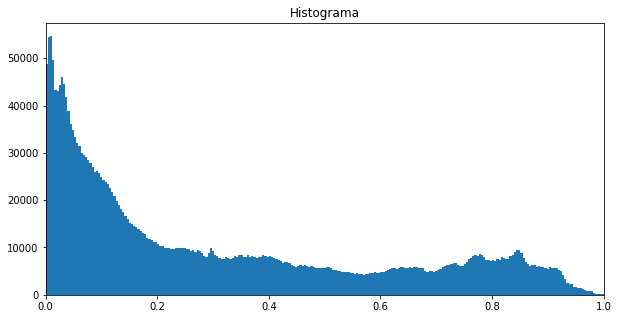

In [36]:
plt.figure( figsize=(10, 5) )
plt.title( 'Histograma' )
plt.hist( gray.ravel(), 255 )
plt.xlim( [0, 1] )
plt.show()

### Diminuindo o contraste

In [37]:
gray

array([[0.32634118, 0.32634118, 0.32634118, ..., 0.35979686, 0.35979686,
        0.36371843],
       [0.30337804, 0.3106549 , 0.31849804, ..., 0.36371843, 0.36371843,
        0.35979686],
       [0.29275059, 0.30059373, 0.30843686, ..., 0.35979686, 0.35587529,
        0.36764   ],
       ...,
       [0.15953882, 0.14777412, 0.12816627, ..., 0.        , 0.        ,
        0.0108949 ],
       [0.16764941, 0.16175686, 0.16510745, ..., 0.        , 0.00392157,
        0.0108949 ],
       [0.1696    , 0.17238431, 0.18217804, ..., 0.        , 0.00392157,
        0.01481647]])

In [38]:
square = np.square( gray )
square

array([[1.06498563e-01, 1.06498563e-01, 1.06498563e-01, ...,
        1.29453782e-01, 1.29453782e-01, 1.32291097e-01],
       [9.20382347e-02, 9.65064681e-02, 1.01441001e-01, ...,
        1.32291097e-01, 1.32291097e-01, 1.29453782e-01],
       [8.57029069e-02, 9.03565878e-02, 9.51332983e-02, ...,
        1.29453782e-01, 1.26647225e-01, 1.35159170e-01],
       ...,
       [2.54526362e-02, 2.18371898e-02, 1.64265939e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.18698889e-04],
       [2.81063253e-02, 2.61652826e-02, 2.72604704e-02, ...,
        0.00000000e+00, 1.53787005e-05, 1.18698889e-04],
       [2.87641600e-02, 2.97163516e-02, 3.31888380e-02, ...,
        0.00000000e+00, 1.53787005e-05, 2.19527801e-04]])

In [39]:
x = [2, 3, 4]
np.square( x )

array([ 4,  9, 16])

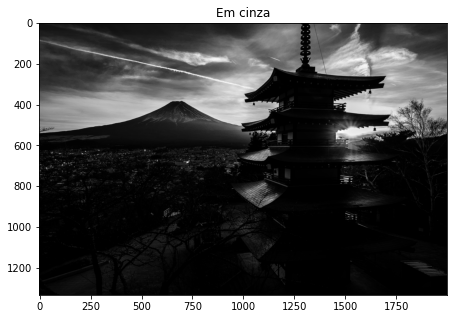

In [40]:
plt.figure( figsize=(10, 5) )
plt.title( 'Em cinza' )
plt.imshow( square, cmap='gray' )
plt.show()

### Aumentando o contraste

In [41]:
sqrt = np.sqrt( gray )
sqrt

array([[0.57126279, 0.57126279, 0.57126279, ..., 0.5998307 , 0.5998307 ,
        0.60309073],
       [0.55079764, 0.55736425, 0.56435631, ..., 0.60309073, 0.60309073,
        0.5998307 ],
       [0.54106431, 0.54826428, 0.55537092, ..., 0.5998307 , 0.59655284,
        0.60633324],
       ...,
       [0.39942311, 0.38441399, 0.35800318, ..., 0.        , 0.        ,
        0.10437865],
       [0.40945013, 0.40219008, 0.40633416, ..., 0.        , 0.06262243,
        0.10437865],
       [0.41182521, 0.4151919 , 0.42682319, ..., 0.        , 0.06262243,
        0.12172293]])

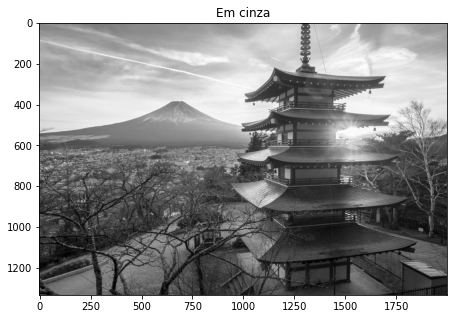

In [42]:
plt.figure( figsize=(10, 5) )
plt.title( 'Em cinza' )
plt.imshow( sqrt, cmap='gray' )
plt.show()

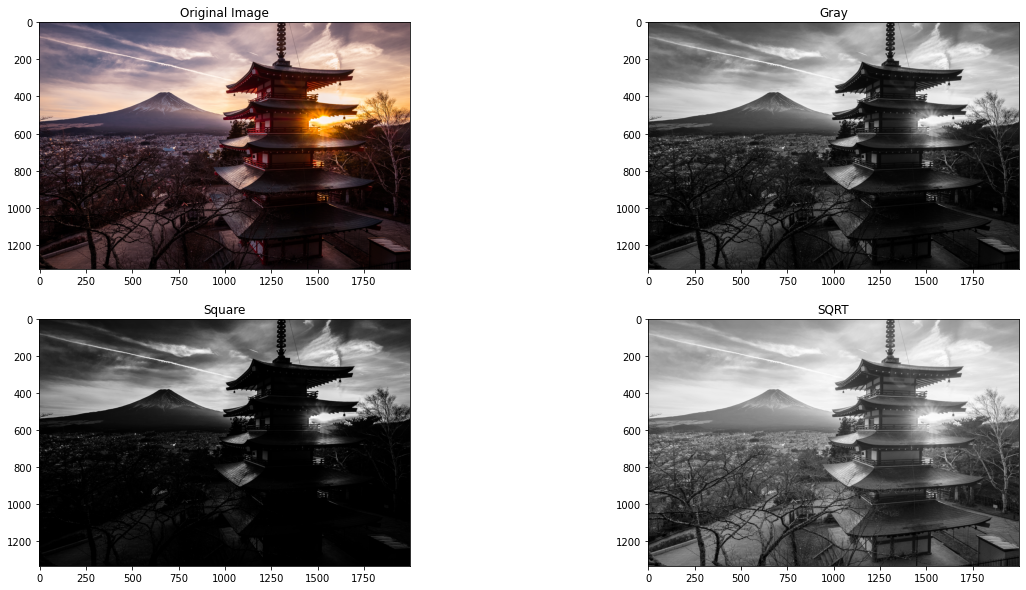

In [43]:
fig, axes = plt.subplots( 2, 2, figsize=( 20, 10 ) )

axes[0][0].set_title( 'Original Image' )
axes[0][0].imshow( img )

axes[0][1].set_title( 'Gray' )
axes[0][1].imshow( gray, cmap='gray' )

axes[1][0].set_title( 'Square' )
axes[1][0].imshow( square, cmap='gray' )

axes[1][1].set_title( 'SQRT' )
axes[1][1].imshow( sqrt, cmap='gray' )

plt.show()

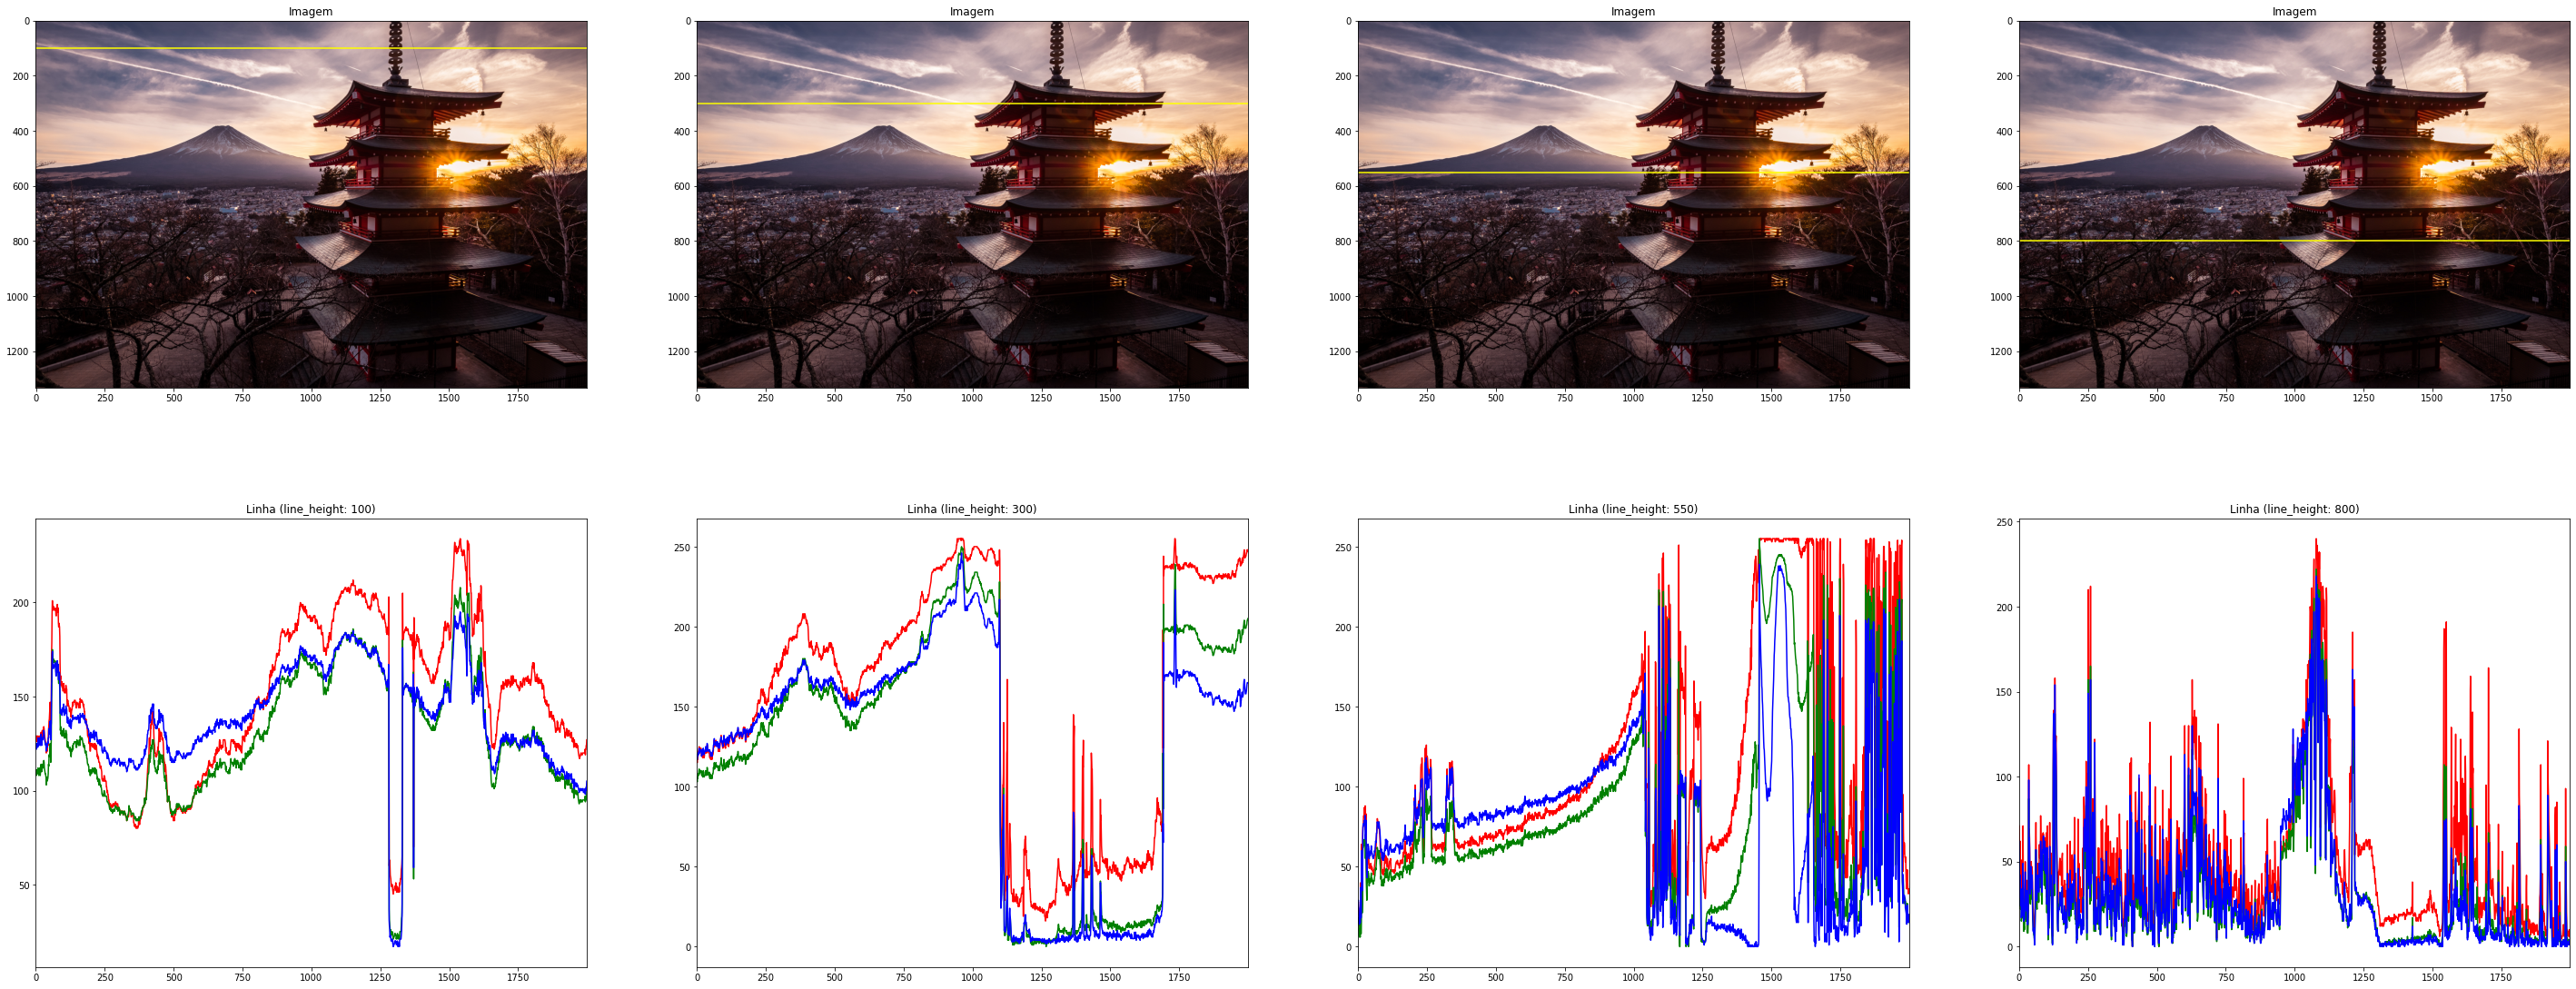

In [44]:
w = img.shape[1]
x = np.linspace(0, w-1, w)

line_heights = [100, 300, 550, 800]

fig, axes = plt.subplots( 
    nrows=2, ncols=len( line_heights ),
    figsize=( 50, 20 ), 
    squeeze=False )

for i, line_height in enumerate( line_heights ):

  axes[0][i].set_title( 'Imagem' )
  axes[0][i].imshow( img )

  axes[1][i].set_title( f'Linha (line_height: {line_height})' )
  axes[1][i].plot( x, img[ line_height, :, 0], color = 'red' )
  axes[1][i].plot( x, img[ line_height, :, 1], color = 'green' )
  axes[1][i].plot( x, img[ line_height, :, 2], color = 'blue' )
  axes[1][i].set_xlim( [0, w-1] )

  # Draw a line on the image
  axes[0][i].plot( 
      [ 0, w-1 ], 
      [ line_height, line_height ], 
      color = 'yellow' )

plt.show()